In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Ass-1_Linear-Regression1_boston_housing.csv to Ass-1_Linear-Regression1_boston_housing.csv


In [41]:
df = pd.read_csv("Ass-1_Linear-Regression1_boston_housing.csv")
df.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X = df.loc[:,df.columns !='MEDV']
y = df.loc[:,df.columns == 'MEDV']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [44]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [45]:
reg.fit(X_train,y_train)

LinearRegression()

In [46]:
y_pred = reg.predict(X_test)

In [47]:
from sklearn.metrics import mean_squared_error,r2_score
print(np.sqrt(mean_squared_error(y_test,y_pred)))


5.041784121402045


In [48]:
print(r2_score(y_test,y_pred))

0.7263451459702517


In [49]:
reg = Sequential()
reg.add(Dense(128,input_shape=(13,),activation="relu",name="Layer1"))
reg.add(Dense(64,activation="relu",name="Layer2"))
reg.add(Dense(1,activation="linear"))

reg.compile(optimizer ="adam",loss="mse",metrics=['mae'])
reg.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer1 (Dense)              (None, 128)               1792      
                                                                 
 Layer2 (Dense)              (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10113 (39.50 KB)
Trainable params: 10113 (39.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
reg.fit(X_train,y_train,epochs=200)

Epoch 1/200
13/13 [==============================] - 1s 3ms/step - loss: 260.7305 - mae: 12.9931
Epoch 2/200
13/13 [==============================] - 0s 2ms/step - loss: 126.1950 - mae: 8.8192
Epoch 3/200
13/13 [==============================] - 0s 2ms/step - loss: 65.1502 - mae: 6.1361
Epoch 4/200
13/13 [==============================] - 0s 3ms/step - loss: 58.1528 - mae: 5.5062
Epoch 5/200
13/13 [==============================] - 0s 3ms/step - loss: 53.1750 - mae: 5.5055
Epoch 6/200
13/13 [==============================] - 0s 2ms/step - loss: 51.2155 - mae: 5.0363
Epoch 7/200
13/13 [==============================] - 0s 2ms/step - loss: 50.3818 - mae: 5.0360
Epoch 8/200
13/13 [==============================] - 0s 3ms/step - loss: 47.5008 - mae: 4.9002
Epoch 9/200
13/13 [==============================] - 0s 3ms/step - loss: 45.7568 - mae: 4.7559
Epoch 10/200
13/13 [==============================] - 0s 3ms/step - loss: 44.4713 - mae: 4.5576
Epoch 11/200
13/13 [==========================

In [51]:
y_pred = reg.predict(X_test)

4/4 [==============================] - 0s 3ms/step


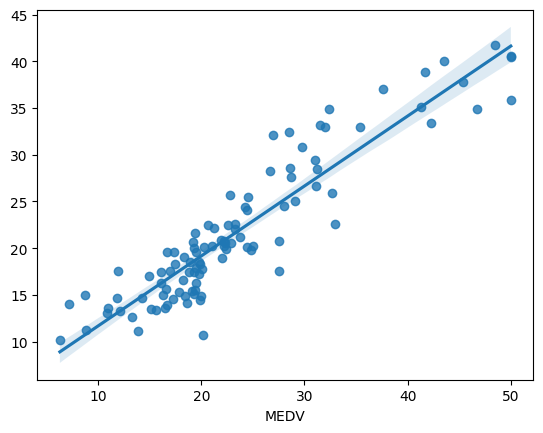

In [52]:
sns.regplot(x=y_test,y = y_pred)
plt.show()

In [53]:
print(r2_score(y_test,y_pred))

0.8100629972936633


In [54]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))

4.20036913309379
